# CNAK

In [1]:
import os, sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.cnak import cnak

In [3]:
# load dataset
from sklearn import datasets
iris = datasets.load_iris()

X_train = iris['data']
y = iris['target']
label_names = iris['feature_names']

X_train = StandardScaler().fit_transform(X_train)

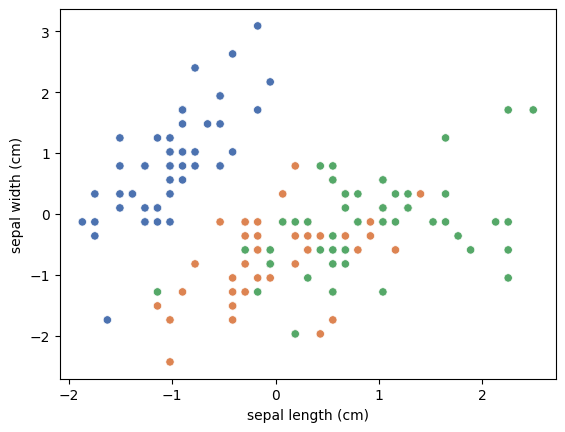

In [4]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=y,
                palette="deep",
                legend=None
                )
plt.xlabel(label_names[0])
plt.ylabel(label_names[1])
plt.show()

# CNAK

In [7]:
labels, scores, centers = cnak.CNAK(X_train)

 gamma: 0.7  K_min: 1  K_max: 21
K_hat: 1


In [ ]:
np.concatenate(centers, axis=0).shape

(210, 4)

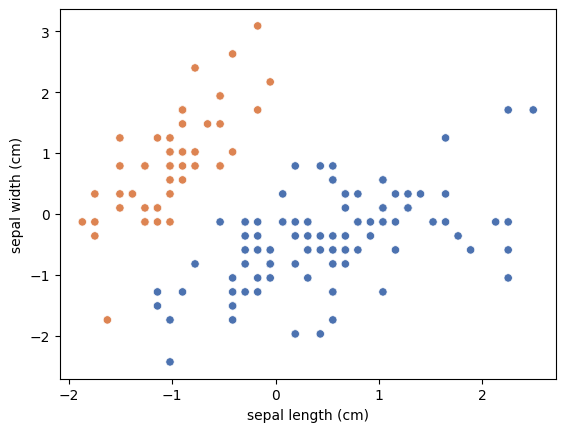

In [ ]:
# View results
# class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=np.array(labels),
                palette="deep",
                legend=None
                )
# plt.plot([x for x, _, _, _ in kmeans.centroids],
#          [y for _, y, _, _ in kmeans.centroids],
#          '+',
#          markersize=10,
#          )
plt.xlabel(label_names[0])
plt.ylabel(label_names[1])
plt.show()

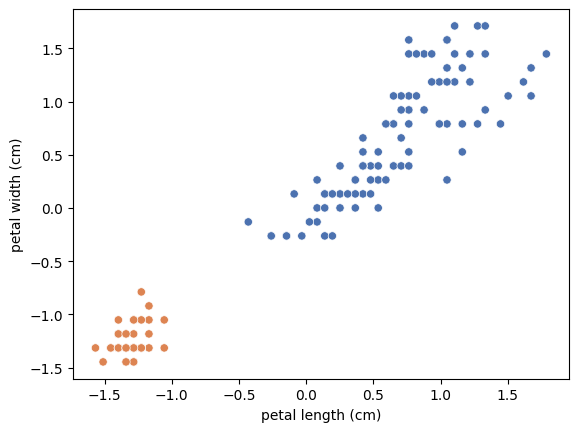

In [ ]:
# View results
# class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[2] for X in X_train],
                y=[X[3] for X in X_train],
                hue=np.array(labels),
                palette="deep",
                legend=None
                )
# plt.plot([x for x, _, _, _ in kmeans.centroids],
#          [y for _, y, _, _ in kmeans.centroids],
#          '+',
#          markersize=10,
#          )
plt.xlabel(label_names[2])
plt.ylabel(label_names[3])
plt.show()

## Kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=0, n_init="auto").fit(X_train)
kmeans_labels = kmeans.labels_

In [ ]:
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Evaluation

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [ ]:
cnak_metrics = []
# Calculate clustering metrics
silhouette = silhouette_score(X_train, np.array(labels))
db_index = davies_bouldin_score(X_train, np.array(labels))
ch_index = calinski_harabasz_score(X_train, np.array(labels))
ari = adjusted_rand_score(y, np.array(labels))
mi = mutual_info_score(y, np.array(labels))

cnak_metrics.append([silhouette,db_index,ch_index,ari,mi])

In [ ]:
np.array(cnak_metrics)

array([[  0.58175005,   0.59331269, 251.34933946,   0.56811594,
          0.63651417]])

In [ ]:
# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")
print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Mutual Information (MI): {mi:.2f}")

Silhouette Score: 0.58
Davies-Bouldin Index: 0.59
Calinski-Harabasz Index: 251.35
Adjusted Rand Index: 0.57
Mutual Information (MI): 0.64


In [ ]:
kmeans_metrics = []
# Calculate clustering metrics
kmeans_silhouette = silhouette_score(X_train, kmeans_labels)
kmeans_db_index = davies_bouldin_score(X_train, kmeans_labels)
kmeans_ch_index = calinski_harabasz_score(X_train, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
kmeans_mi = mutual_info_score(y, kmeans_labels)

kmeans_metrics.append([kmeans_silhouette,kmeans_db_index,kmeans_ch_index,kmeans_ari,kmeans_mi])

In [ ]:
metrics = np.concatenate((np.array(kmeans_metrics), np.array(cnak_metrics)))

In [ ]:
pd.DataFrame(data=metrics, columns=['silhouette','db_index','ch_index','ari','mi'], index=['kmeans','cnak'])

,silhouette,db_index,ch_index,ari,mi
kmeans,0.58175,0.593313,251.349339,0.568116,0.636514
cnak,0.58175,0.593313,251.349339,0.568116,0.636514
